In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [4]:
y_hat = clf.predict(X_test)

In [5]:
print(y_hat == y_test)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True]


## Bias

In [6]:
acc_train = clf.score(X_train, y_train)
acc_train

1.0

## Varianza

### Test Accuracy

In [7]:
acc_val = clf.score(X_test, y_test)
acc_val

0.95

In [8]:
(acc_val - acc_train) * 100

-5.000000000000004

[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.663\nsamples = 90\nvalue = [34, 27, 29]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.7, 'x[2] <= 5.05\ngini = 0.499\nsamples = 56\nvalue = [0, 27, 29]'),
 Text(0.4, 0.5, 'x[3] <= 1.75\ngini = 0.128\nsamples = 29\nvalue = [0, 27, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.6, 0.3, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

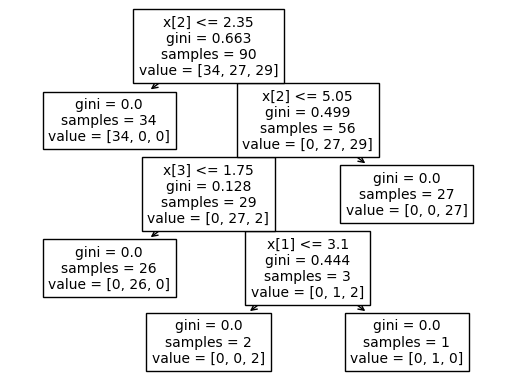

In [9]:
tree.plot_tree(clf)

In [10]:
import graphviz

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None)
print(dot_data)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[2] <= 2.35\ngini = 0.663\nsamples = 90\nvalue = [34, 27, 29]"] ;
1 [label="gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[2] <= 5.05\ngini = 0.499\nsamples = 56\nvalue = [0, 27, 29]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="x[3] <= 1.75\ngini = 0.128\nsamples = 29\nvalue = [0, 27, 2]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]"] ;
3 -> 4 ;
5 [label="x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]"] ;
2 -> 8 ;
}


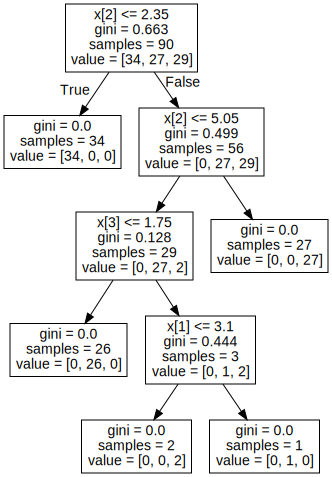

In [12]:
graphviz.Source(dot_data)

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<petal length (cm) &le; 2.35<br/>gini = 0.663<br/>samples = 90<br/>value = [34, 27, 29]<br/>class = setosa>, fillcolor="#fdf5ef"] ;
1 [label=<gini = 0.0<br/>samples = 34<br/>value = [34, 0, 0]<br/>class = setosa>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<petal length (cm) &le; 5.05<br/>gini = 0.499<br/>samples = 56<br/>value = [0, 27, 29]<br/>class = virginica>, fillcolor="#f6f1fd"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<petal width (cm) &le; 1.75<br/>gini = 0.128<br/>samples = 29<br/>value = [0, 27, 2]<br/>class = versicolor>, fillcolor="#48e78a"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 26<br/>value = [0, 26, 0]<br/>class = versicolor>, fillcolor="#39e581"] ;
3 -> 4 ;
5 [label=<sepal width (cm) &le; 3.1<br/>gini = 0.444<br/>samples = 3<br/>value = [0, 1, 2]

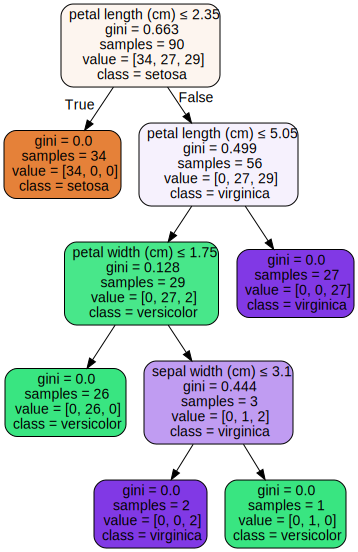

In [15]:
graphviz.Source(dot_data)